# Gated Recurrent Neural Network paper (https://arxiv.org/abs/1412.3555)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt

In [3]:
# Generate synthetic sequence data (sinusoidal for clarity)
def generate_data(seq_len=50, num_samples=1000):
    X, y = [], []
    for _ in range(num_samples):
        start = np.random.rand() * 2 * np.pi
        freq = np.random.rand() * 0.5 + 0.1
        x_seq = np.sin(np.linspace(start, start + freq * seq_len, seq_len))
        y_seq = np.sin(start + freq * seq_len + freq)
        X.append(x_seq)
        y.append(y_seq)
    X = np.array(X)[..., np.newaxis]
    y = np.array(y)
    return X, y

In [4]:
# Create dataset
X, y = generate_data()
X_train, X_val, y_train, y_val = X[:800], X[800:], y[:800], y[800:]

In [5]:
# Define vanilla RNN model (tanh-based)
model = Sequential([
    SimpleRNN(32, activation='tanh', input_shape=(X.shape[1], 1)),
    Dense(1)
])

In [6]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [7]:
# Train model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0783 - mae: 0.2282 - val_loss: 0.0156 - val_mae: 0.1007
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0115 - mae: 0.0843 - val_loss: 0.0048 - val_mae: 0.0552
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mae: 0.0506 - val_loss: 0.0022 - val_mae: 0.0388
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0021 - mae: 0.0366 - val_loss: 0.0017 - val_mae: 0.0319
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015 - mae: 0.0305 - val_loss: 0.0011 - val_mae: 0.0260


In [8]:
# Evaluate model
loss, mae = model.evaluate(X_val, y_val)
print(f"Validation MAE: {mae:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.8037e-04 - mae: 0.0244 
Validation MAE: 0.0260


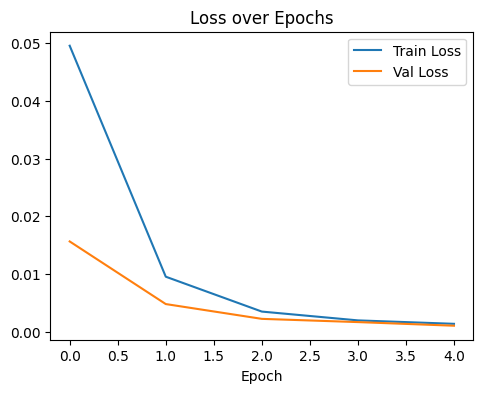

In [9]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.legend()

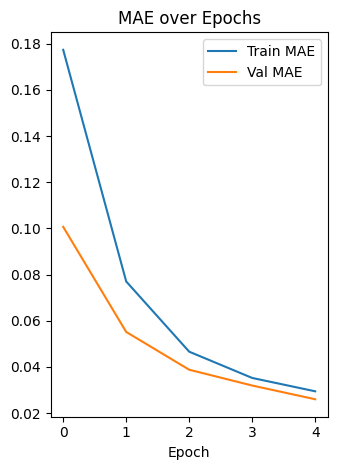

In [10]:
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('MAE over Epochs')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


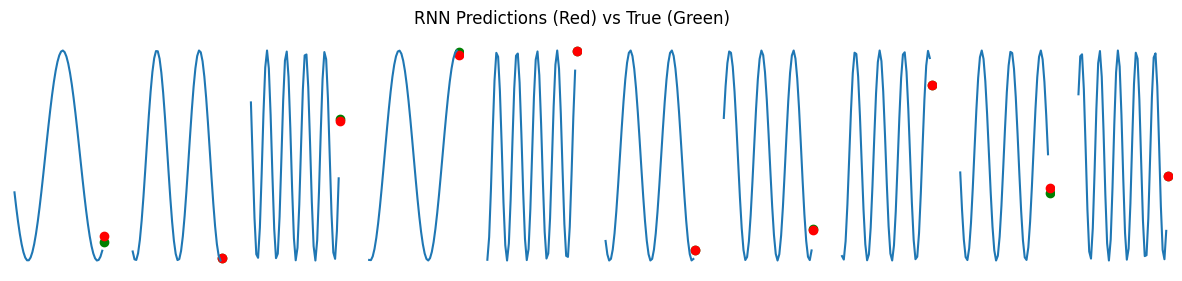

In [11]:
# Visualize predictions
preds = model.predict(X_val[:10])
plt.figure(figsize=(15, 3))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.plot(X_val[i].squeeze(), label='Input')
    plt.scatter(len(X_val[i]), y_val[i], color='green', label='True')
    plt.scatter(len(X_val[i]), preds[i], color='red', label='Pred')
    plt.axis('off')
plt.suptitle('RNN Predictions (Red) vs True (Green)')
plt.show()
